Submitted By: Nirmala Regmi
Student ID: c0903616

Required Libraries

In [1]:
# Installing required packages 
# !pip install numpy pandas matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pickle

import warnings
warnings.filterwarnings('ignore')

Loading and Understanding the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('C:/Users/regmi/OneDrive/Desktop/Term 3/Neural Network-Bhabik/Algerian_forest_fires_cleaned.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())


   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


 Data Cleaning and Feature Selection

In [3]:
# Dropping any irrelevant columns, such as 'Region', if it's not useful for the model
from sklearn.preprocessing import LabelEncoder
if 'Region' in data.columns:
    data = data.drop(['Region'], axis=1)

# Handling any missing values by dropping rows with missing data
data = data.dropna()

# Encode the 'Classes' column as it contains categorical data
label_encoder = LabelEncoder()
data['Classes'] = label_encoder.fit_transform(data['Classes'])

# Verify all columns are now numeric
print("\nData types after encoding:\n", data.dtypes)

# Separate features (X) and the target variable (y)
X = data.drop('FWI', axis=1)
y = data['FWI']



Data types after encoding:
 day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
dtype: object


Exploratory Data Analysis (EDA) and Visualization

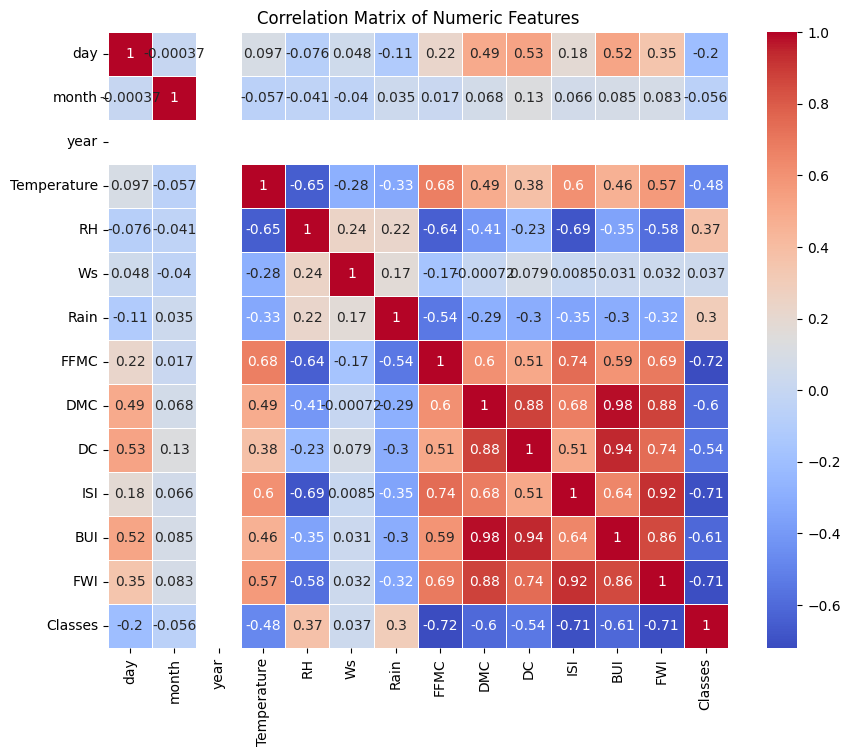

In [4]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Visualize the correlation matrix to identify relationships between numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


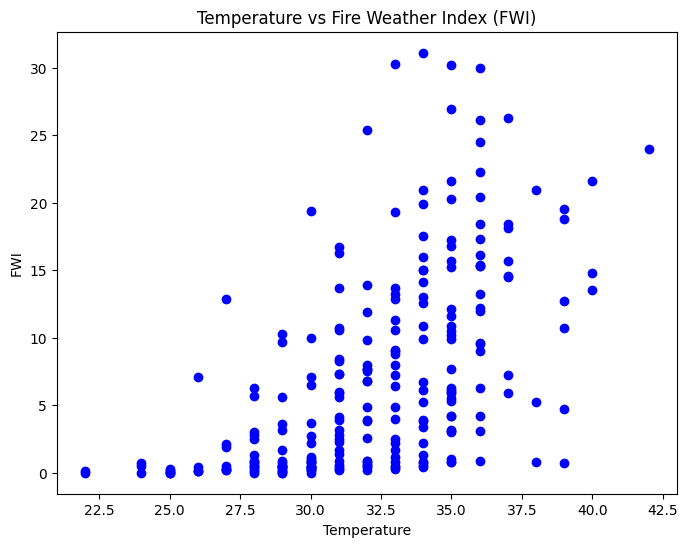

In [5]:
# Scatter plot example: Temperature vs FWI
plt.figure(figsize=(8,6))
plt.scatter(data['Temperature'], data['FWI'], color='b')
plt.title("Temperature vs Fire Weather Index (FWI)")
plt.xlabel("Temperature")
plt.ylabel("FWI")
plt.show()


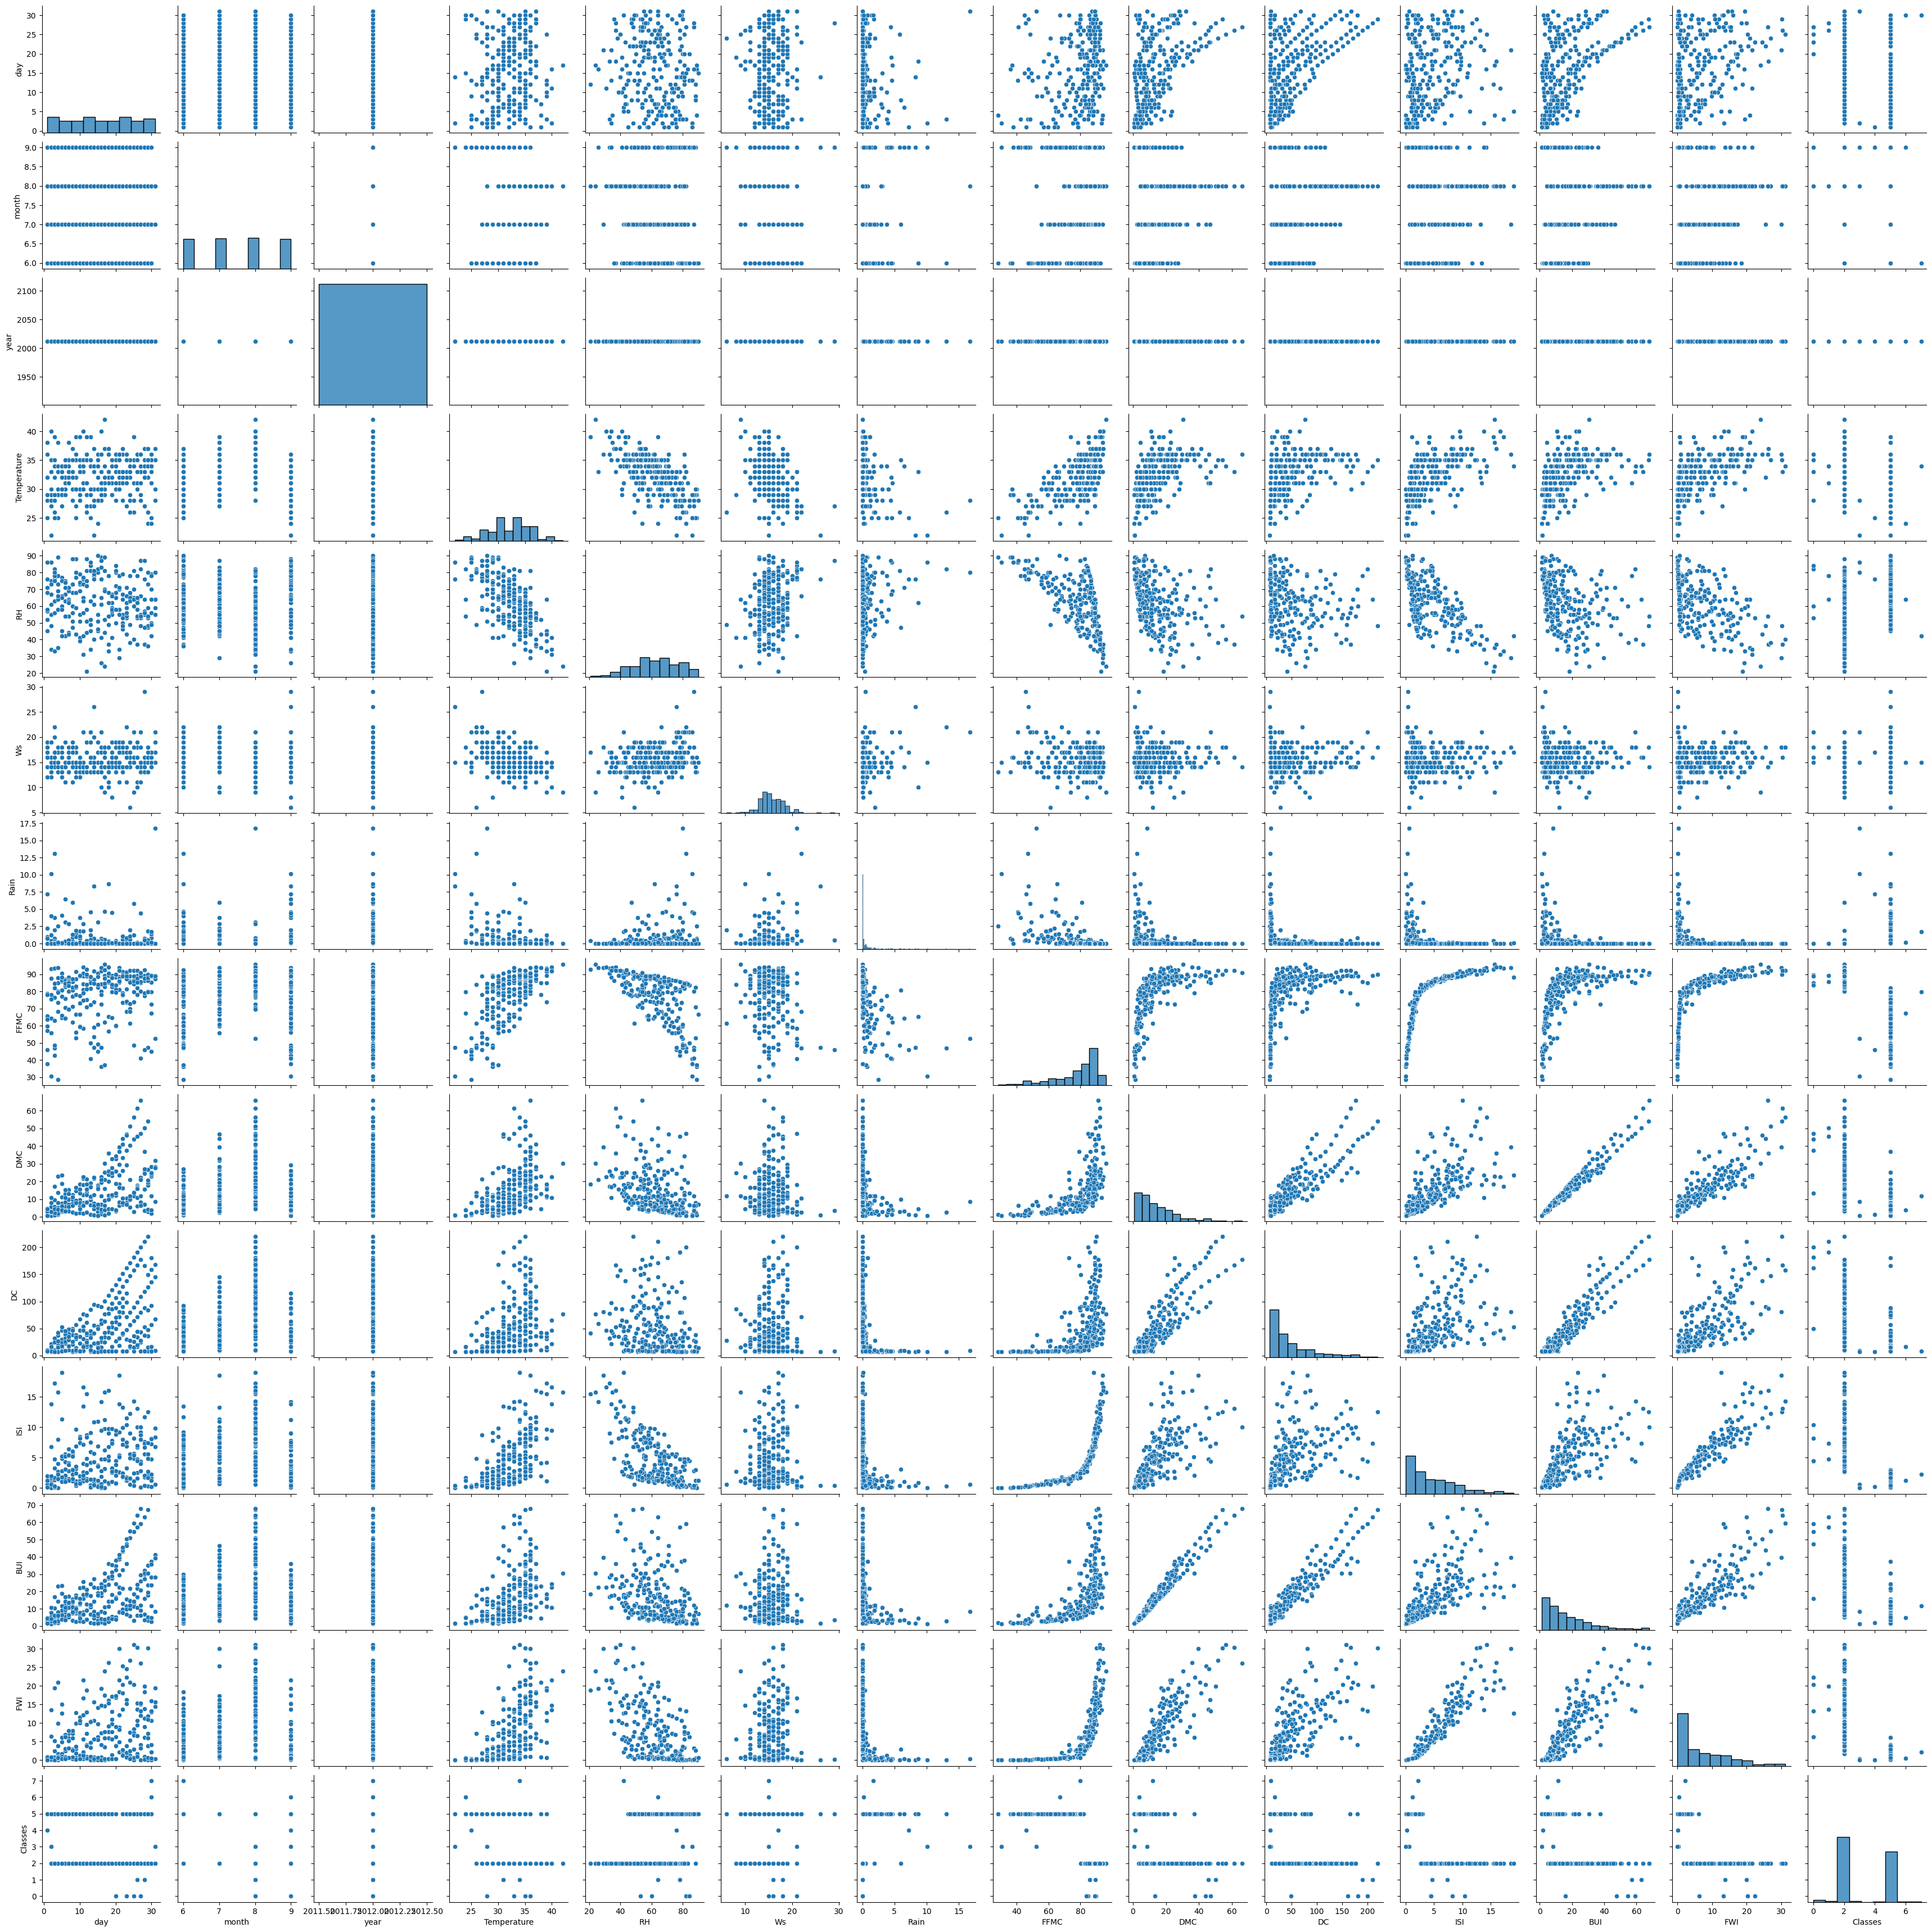

In [6]:
# Pairplot to explore relationships between different features
sns.pairplot(data)
plt.show()

In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (194, 13), Testing data shape: (49, 13)


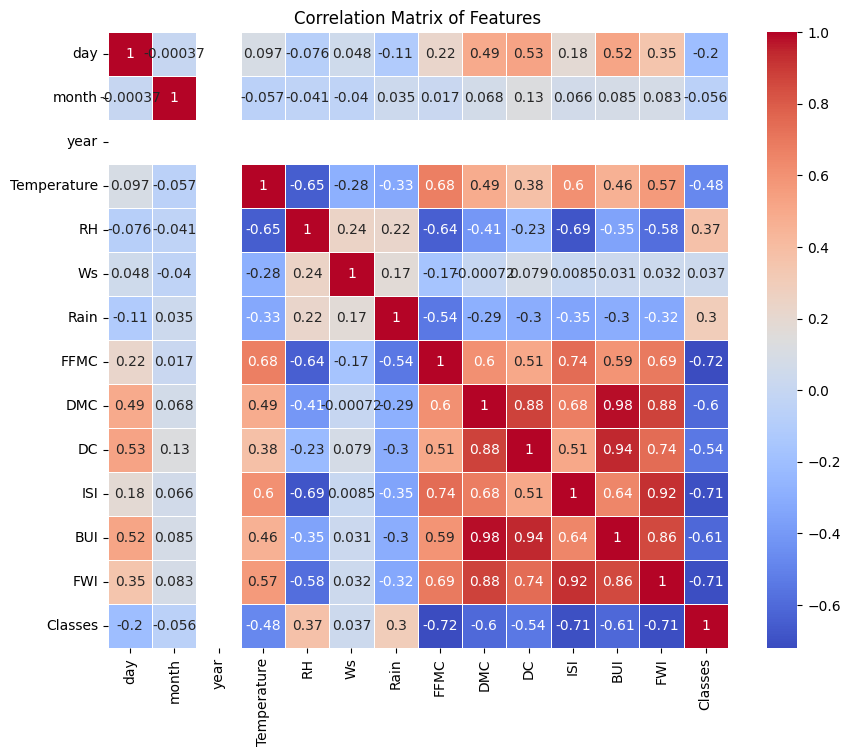

In [8]:
# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

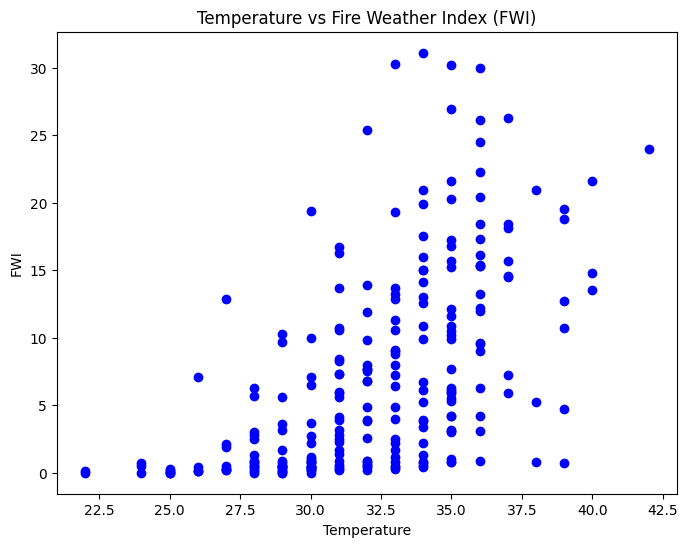

In [9]:
# Scatter plot: Temperature vs Fire Weather Index (FWI)
plt.figure(figsize=(8, 6))
plt.scatter(data['Temperature'], data['FWI'], color='b')
plt.title("Temperature vs Fire Weather Index (FWI)")
plt.xlabel("Temperature")
plt.ylabel("FWI")
plt.show()

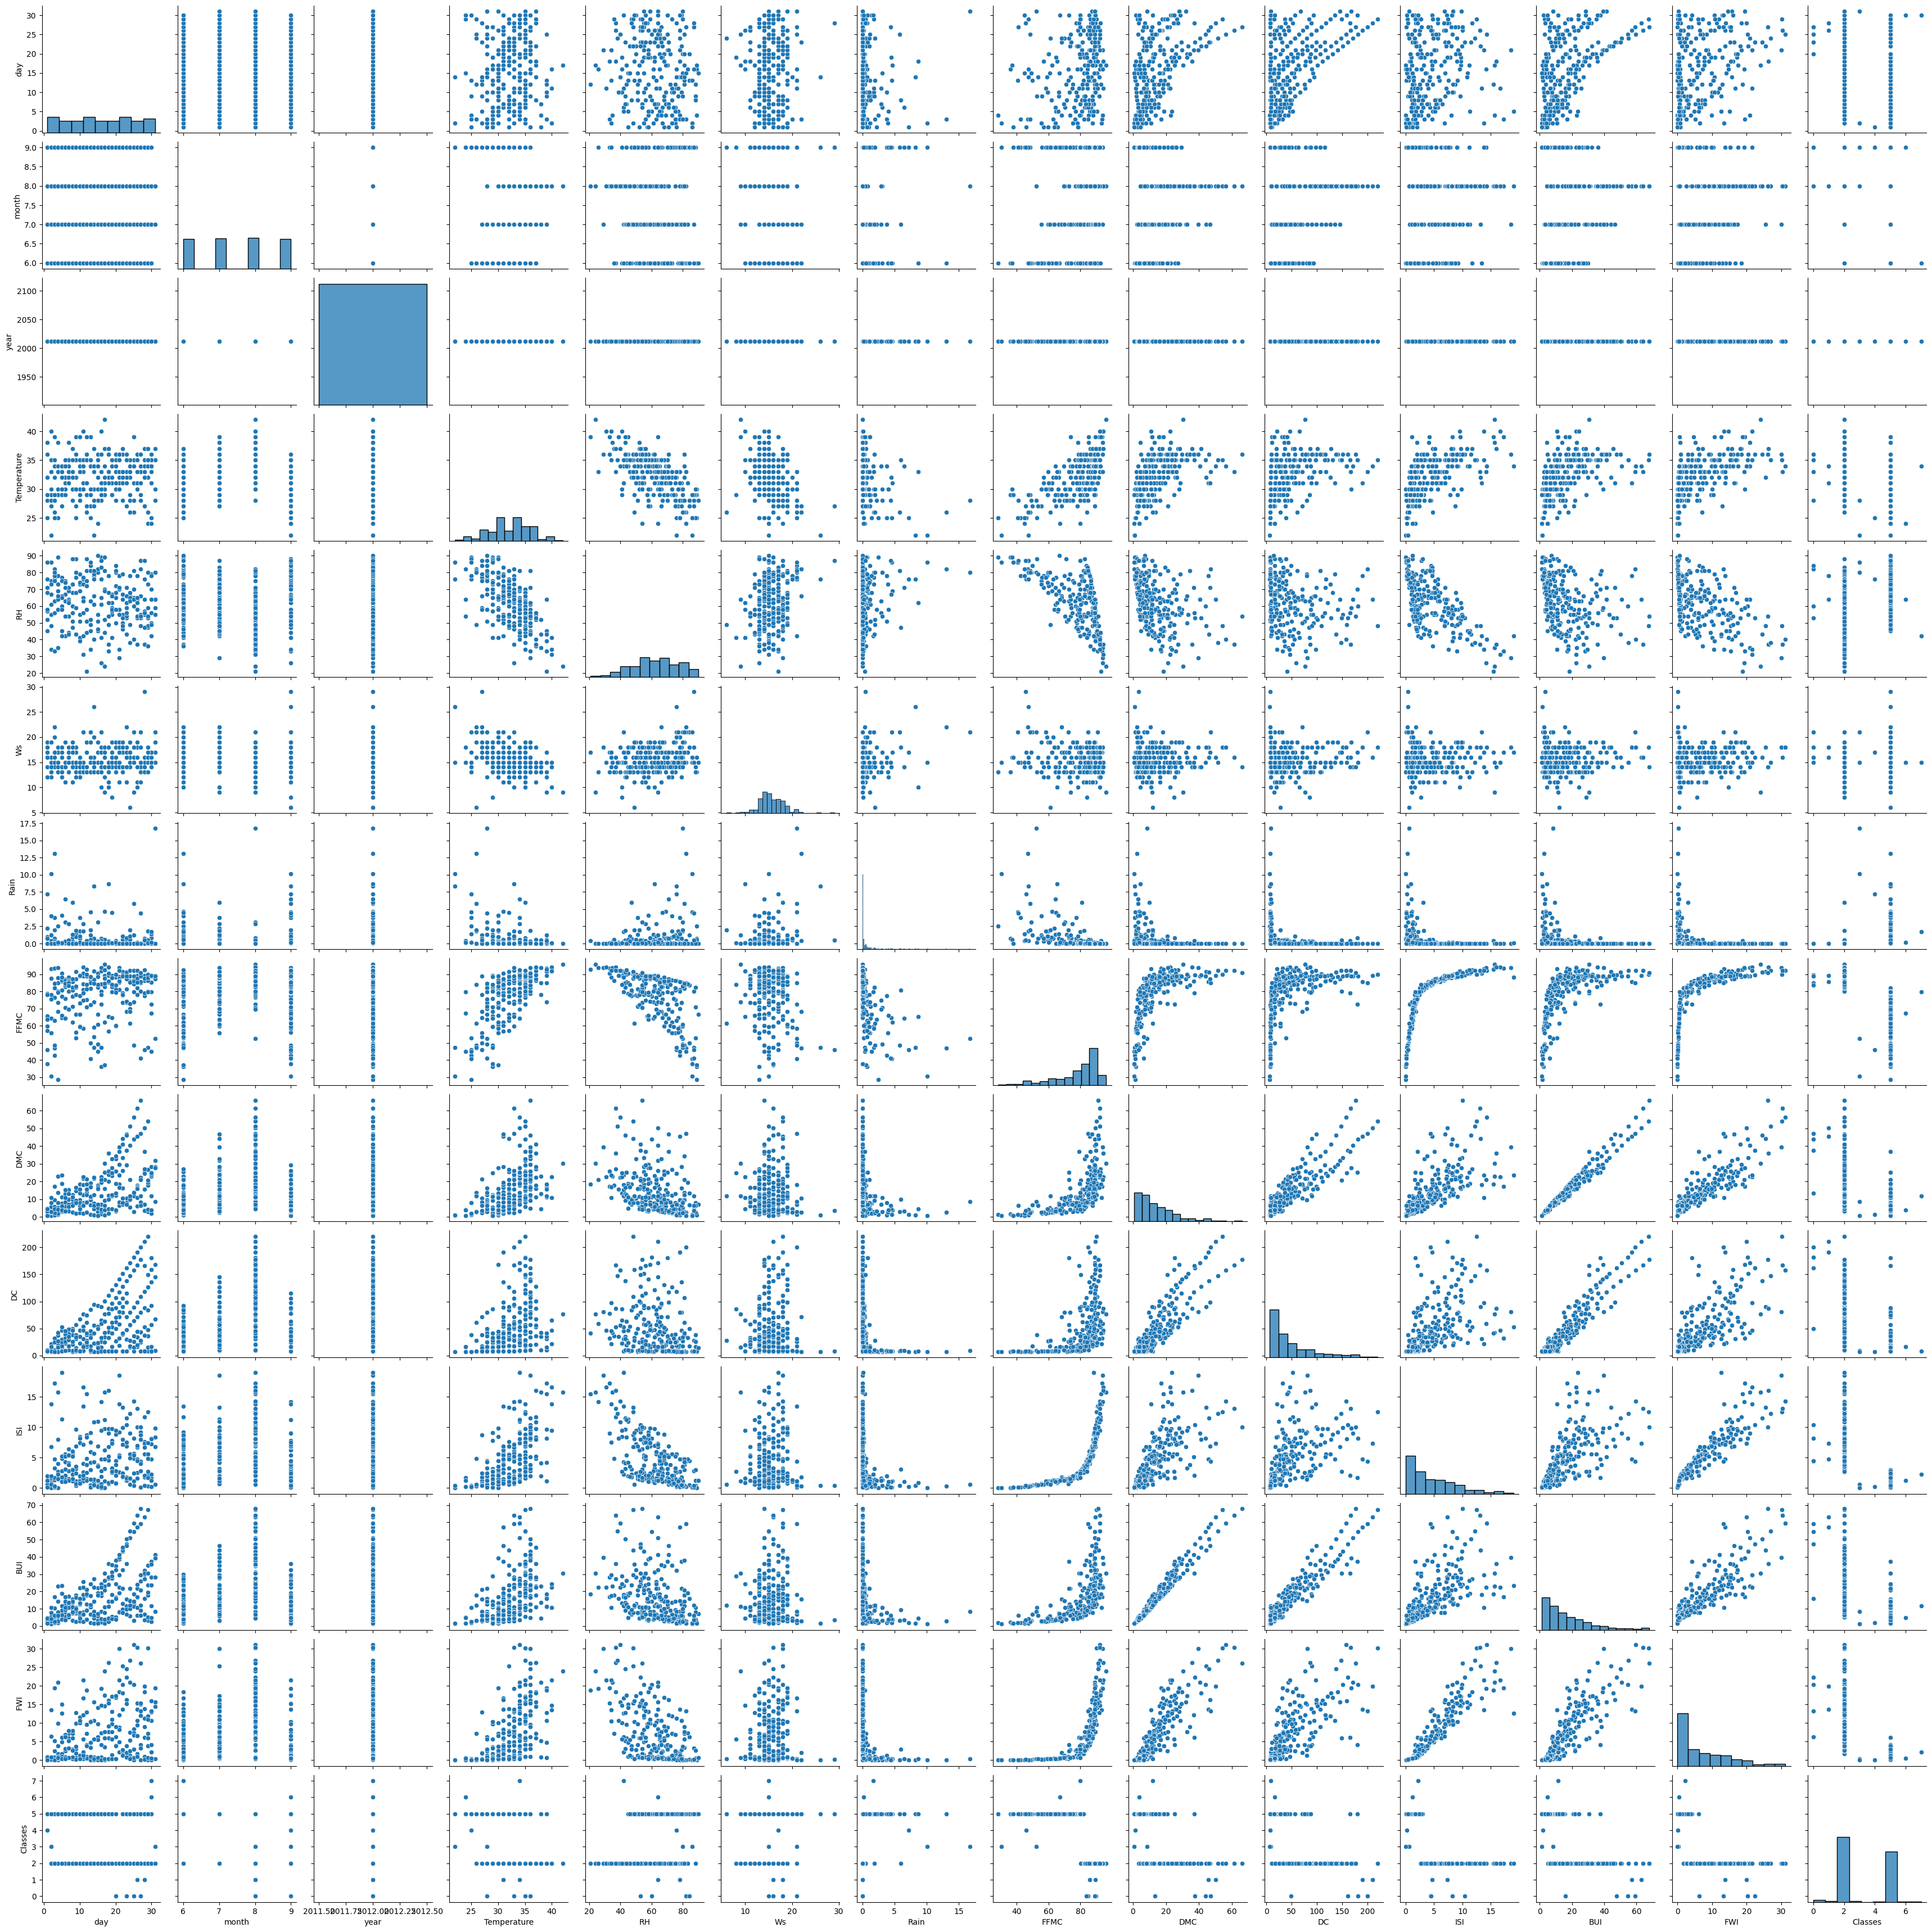

In [10]:
# Pairplot to explore relationships between different features
sns.pairplot(data)
plt.show()

Multiple Linear Regression

In [11]:
# Initialize and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("\nLinear Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Linear Regression Results:
Mean Squared Error: 0.34313882761452824
R-squared: 0.988678432899717


Polynomial Regression

In [12]:
# Apply polynomial features (degree 2) to capture non-linear relationships
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train a polynomial regression model
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)

# Make predictions with the polynomial regression model
y_poly_pred = poly_regressor.predict(X_poly_test)

# Evaluate the polynomial regression model
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"Polynomial Regression - Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression - R^2 Score: {r2_poly}")


Polynomial Regression - Mean Squared Error: 0.3143507691269911
Polynomial Regression - R^2 Score: 0.9896282698450705


Regularization Models (Ridge and Lasso)

In [13]:
# Ridge Regression with alpha = 1.0
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)
print(f"Ridge Regression - MSE: {mse_ridge}, R^2: {r2_ridge}")

# Lasso Regression with alpha = 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)
print(f"Lasso Regression - MSE: {mse_lasso}, R^2: {r2_lasso}")


Ridge Regression - MSE: 0.3460370274092879, R^2: 0.9885828093188052
Lasso Regression - MSE: 0.4313045532486567, R^2: 0.9857694814830232


Cross-Validation and Hyperparameter Tuning

In [14]:
# Hyperparameter tuning for Ridge Regression using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)

# Display the best alpha parameter after tuning
print(f"Best alpha for Ridge: {grid_ridge.best_params_}")

# Evaluate the best model using cross-validation
best_ridge = grid_ridge.best_estimator_
cv_scores = cross_val_score(best_ridge, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R^2 score: {np.mean(cv_scores)}")


Best alpha for Ridge: {'alpha': 100}
Cross-validation R^2 score: 0.9564543257989037


Saving the Final Model using Pickle

In [15]:
# Save the best Ridge model as a pickle file
with open(r'../Models/best_ridge_model1.pkl', 'wb') as file:
    pickle.dump(best_ridge, file)


# To load the model later:
# with open('best_ridge_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)


Testing on Unseen Data

In [16]:
# Use the test data to evaluate the final model's performance
y_test_pred = best_ridge.predict(X_test)

# Final evaluation of the model on unseen data
final_mse = mean_squared_error(y_test, y_test_pred)
final_r2 = r2_score(y_test, y_test_pred)

print(f"Final Ridge Model - Test MSE: {final_mse}, Test R^2: {final_r2}")


Final Ridge Model - Test MSE: 0.6333652993397701, Test R^2: 0.9791026629503982
